<a href="https://colab.research.google.com/github/wesley0521/Deep-Learning/blob/main/Face%20Recognize%20--%20CNN%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

Dataset = pd.read_csv("icml_face_data.csv")

Dataset.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
# 發現欄位有空格，所以把空格給去除
print("[處理前]")
print(Dataset.columns)

Dataset.columns = list(map(lambda a: a.lstrip(), Dataset.columns)) # 這一行程式碼可以把空格去除

print("[處理後]")
print(Dataset.columns)

[處理前]
Index(['emotion', ' Usage', ' pixels'], dtype='object')
[處理後]
Index(['emotion', 'Usage', 'pixels'], dtype='object')


In [ ]:
Dataset["Usage"].value_counts()

# Training ==> 拿來訓練
# PublicTest 與 PrivateTest ==> 拿來評估

,count
Usage,
Training,28709
PublicTest,3589
PrivateTest,3589


In [ ]:
# 取得 training dataset 和 testing dataset 的 index
Train_index = Dataset["Usage"]=="Training"
Test_index = (Train_index == False)

# 然後將 Dataframe 區分成 Dataset_Train 和 Dataset_Test，這裡為什麼使用 reset_index(drop=True) 呢？
Dataset_Train = Dataset[Train_index].reset_index(drop=True)
Dataset_Test  = Dataset[Test_index].reset_index(drop=True)

In [ ]:
# 確認 Dataset_Train 的 Usage 只剩下 Training 的資料
print(Dataset_Train["Usage"].value_counts())

Dataset_Train = Dataset_Train.drop(["Usage"], axis=1)

Dataset_Train.head()

Usage
Training    28709
Name: count, dtype: int64


,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
# 確認 Dataset_Test 的 Usage 只剩下 PublicTest, PrivateTest 的資料
print(Dataset_Test["Usage"].value_counts())

Dataset_Test = Dataset_Test.drop(["Usage"], axis=1)

# 觀察 reset_index(drop=True) 的效果
Dataset_Test.head()

Usage
PublicTest     3589
PrivateTest    3589
Name: count, dtype: int64


,emotion,pixels
0,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,1,156 184 198 202 204 207 210 212 213 214 215 21...
2,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,6,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [ ]:
# 觀察訓練資料集的一筆資料

Example = Dataset_Train["pixels"][0]
print(Example)
print(f"\n其資料型態是{type(Example)}，因此可以使用 split() 的方法\n")

Example_split = Example.split()
print(Example_split)

print(f"陣列長度為 {len(Example_split)}，而 48x48={48*48}")

70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92 

第 0 筆資料的 Emotion 是 Angry，影像為：


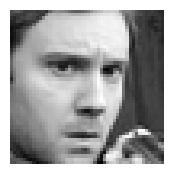


第 1 筆資料的 Emotion 是 Angry，影像為：


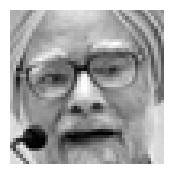


第 2 筆資料的 Emotion 是 Fear，影像為：


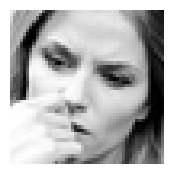


第 3 筆資料的 Emotion 是 Sad，影像為：


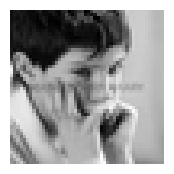


第 4 筆資料的 Emotion 是 Neutral，影像為：


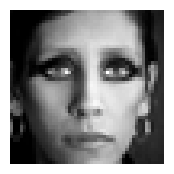


第 5 筆資料的 Emotion 是 Fear，影像為：


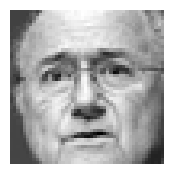


第 6 筆資料的 Emotion 是 Sad，影像為：


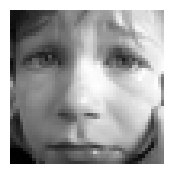


第 7 筆資料的 Emotion 是 Happy，影像為：


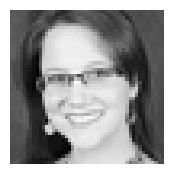


第 8 筆資料的 Emotion 是 Happy，影像為：


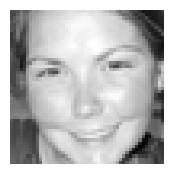


第 9 筆資料的 Emotion 是 Fear，影像為：


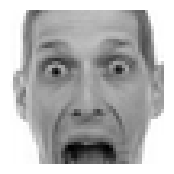


第 10 筆資料的 Emotion 是 Angry，影像為：


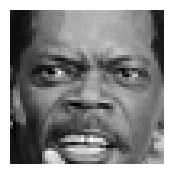


第 11 筆資料的 Emotion 是 Neutral，影像為：


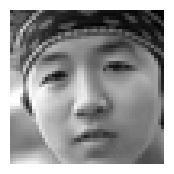


第 12 筆資料的 Emotion 是 Neutral，影像為：


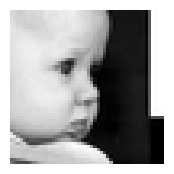


第 13 筆資料的 Emotion 是 Neutral，影像為：


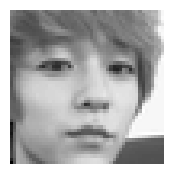


第 14 筆資料的 Emotion 是 Happy，影像為：


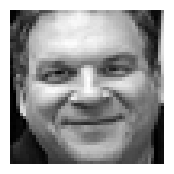


第 15 筆資料的 Emotion 是 Surprise，影像為：


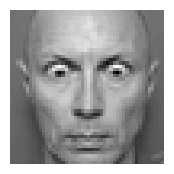


第 16 筆資料的 Emotion 是 Happy，影像為：


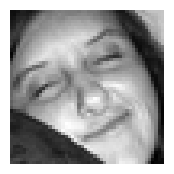


第 17 筆資料的 Emotion 是 Fear，影像為：


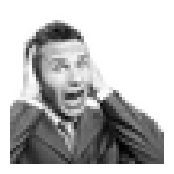


第 18 筆資料的 Emotion 是 Neutral，影像為：


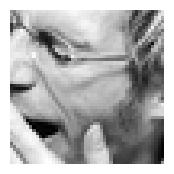


第 19 筆資料的 Emotion 是 Sad，影像為：


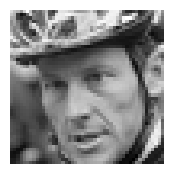

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pixel_to_img(Example):
  Example_split = Example.split()
  Example_split = np.array(Example_split).astype(int)
  Example_img = Example_split.reshape(48,48)
  return Example_img

def draw_img(Example_img):
  # 繪製影像
  plt.figure(figsize=(2,2))
  plt.imshow(Example_img, cmap="gray")
  plt.axis("off")
  plt.show()

# 為此 Dataset 定義的 mapping 關係
Emotion_Rule = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

# 觀察前 20 筆資料
for index in range(20):

  Example = Dataset_Train["pixels"][index]
  Example_emt = Dataset_Train["emotion"][index]
  Example_img = pixel_to_img(Example)

  print(f"第 {index} 筆資料的 Emotion 是 {Emotion_Rule[Example_emt]}，影像為：")
  draw_img(Example_img)
  print()

In [ ]:
from tqdm import tqdm

def df_to_dataset(Dataset_df):

  Emotion_List = []
  Image_List = []

  for index in tqdm(range(len(Dataset_df))):

    # 取出每一筆資料的 emotion 和 pixels
    emotion = Dataset_df["emotion"][index]
    pixel  = Dataset_df["pixels"][index]

    # 將 pixel 轉換成 CNN 會用到的 3 維矩陣(img) H, W, C
    img = pixel_to_img(pixel).reshape(48,48,1)

    # 將 X , Y 放進 Emotion_List 和 Image_List 當中
    Emotion_List.append(emotion)
    Image_List.append(img)

  # 將 List 轉換為 numpy array~!
  Images_nparray = np.array(Image_List)
  Emotion_nparray = np.array(Emotion_List)

  return Images_nparray, Emotion_nparray

In [ ]:
Train_imgs, Train_labels = df_to_dataset(Dataset_Train)
Test_imgs, Test_labels = df_to_dataset(Dataset_Test)

print(f"訓練資料集 X 的 shape 是 {Train_imgs.shape}, Y 的 shape 是 {Train_labels.shape}")
print(f"驗證資料集 X 的 shape 是 {Test_imgs.shape}, Y 的 shape 是 {Test_labels.shape}")

100%|██████████| 7178/7178 [00:08<00:00, 833.55it/s]


訓練資料集 X 的 shape 是 (28709, 48, 48, 1), Y 的 shape 是 (28709,)
驗證資料集 X 的 shape 是 (7178, 48, 48, 1), Y 的 shape 是 (7178,)


In [ ]:
# 所以神經網路的輸出需要有七個 neuron

np.unique(Test_labels)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
Train_imgs = Train_imgs/255.
Test_imgs = Test_imgs/255.

In [ ]:
#建立CNN模型
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Softmax
from tensorflow.keras.regularizers import l2

L2_Lambda = 1e-6
Drop_Prob = 0.2

CNN_Model = tf.keras.models.Sequential([

    # 第一個 block ==> 目前 feature map: 48 x 48 x 1
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same", input_shape=(48,48,1)),
    Dropout(Drop_Prob),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same", kernel_regularizer=l2(L2_Lambda)),
    Dropout(Drop_Prob),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same", kernel_regularizer=l2(L2_Lambda)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)), #  目前 feature map: 24 x 24 x 64

    # 第二個 block
    Dropout(Drop_Prob),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same", kernel_regularizer=l2(L2_Lambda)),
    Dropout(Drop_Prob),
    Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same", kernel_regularizer=l2(L2_Lambda)),
    Dropout(Drop_Prob),
    Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same", kernel_regularizer=l2(L2_Lambda)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)), #  目前 feature map: 12 x 12 x 128

    # 第三個 block
    Dropout(Drop_Prob),
    Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same", kernel_regularizer=l2(L2_Lambda)),
    Dropout(Drop_Prob),
    Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same", kernel_regularizer=l2(L2_Lambda)),
    Dropout(Drop_Prob),
    Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same", kernel_regularizer=l2(L2_Lambda)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Flatten(), # 12 x 12 x 256

    # 第四個 block
    Dropout(Drop_Prob),
    Dense(units=256, activation="relu", kernel_regularizer=l2(L2_Lambda)),
    Dropout(Drop_Prob),
    Dense(units=128, activation="relu", kernel_regularizer=l2(L2_Lambda)),
    Dropout(Drop_Prob),
    Dense(units=64, activation="relu", kernel_regularizer=l2(L2_Lambda)),

    # 輸出層
    Dropout(Drop_Prob),
    Dense(units=7, activation="softmax"),
])

CNN_Model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,89

 Total params: 3,748,103 (14.30 MB)

 Trainable params: 3,748,103 (14.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Batch_Size = 512
Num_of_Epoch = 40
Learning_Rate = 1e-3

# 最佳化器
Optimizer_Adam = tf.keras.optimizers.Adam(learning_rate=Learning_Rate)

# 損失函數
Loss_Function = tf.keras.losses.SparseCategoricalCrossentropy()

# 編譯模型
CNN_Model.compile(
    loss=Loss_Function,
    optimizer=Optimizer_Adam,
    metrics=['accuracy']
)

# 學習率排程器(Learning Rate Scheduler
def scheduler(epoch, lr):
  if epoch < 20:
    return lr
  else:
    return lr * tf.math.exp(-0.1).numpy()

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

## 訓練模型

In [ ]:
History = CNN_Model.fit(
    x = Train_imgs,
    y = Train_labels,
    validation_data = (Test_imgs, Test_labels),
    batch_size = Batch_Size,
    epochs = Num_of_Epoch,
    callbacks=[callback]
)

Epoch 1/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 485ms/step - accuracy: 0.5780 - loss: 1.1090 - val_accuracy: 0.5692 - val_loss: 1.1292 - learning_rate: 0.0010
Epoch 2/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 286ms/step - accuracy: 0.6051 - loss: 1.0519 - val_accuracy: 0.5773 - val_loss: 1.1148 - learning_rate: 0.0010
Epoch 3/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 288ms/step - accuracy: 0.6090 - loss: 1.0371 - val_accuracy: 0.5834 - val_loss: 1.1064 - learning_rate: 0.0010
Epoch 4/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - accuracy: 0.6159 - loss: 1.0191 - val_accuracy: 0.5798 - val_loss: 1.1179 - learning_rate: 0.0010
Epoch 5/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 289ms/step - accuracy: 0.6258 - loss: 0.9986 - val_accuracy: 0.5809 - val_loss: 1.1019 - learning_rate: 0.0010
Epoch 6/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 291ms/step - accuracy: 0.6301 - loss: 0.9800 - val_accuracy: 0.5889 - val_loss: 1.1065 - learning_rate: 0.0010
Epoch 7/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - accuracy: 0.6366 - loss: 0.

# 步驟六：評估模型表現

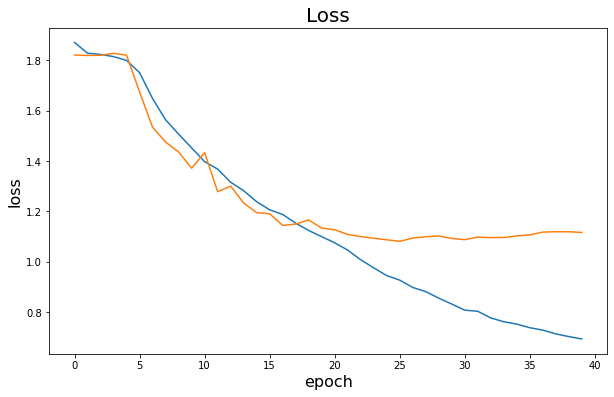

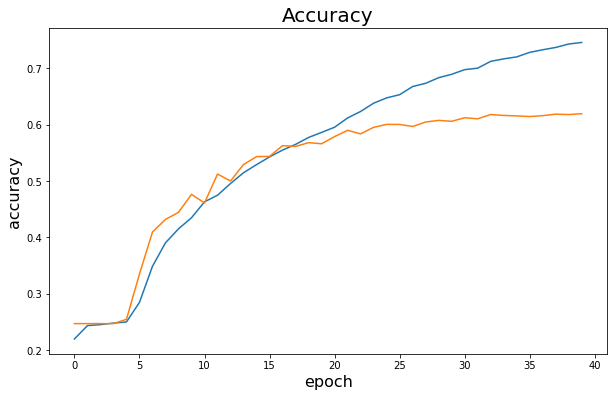

In [ ]:
loss = History.history["loss"]
accuracy = History.history["accuracy"]
val_loss = History.history["val_loss"]
val_accuracy = History.history["val_accuracy"]

# loss
plt.figure(figsize=(10,6))
plt.plot(loss, label="train loss")
plt.plot(val_loss, label="val loss")
plt.title("Loss", fontsize=20)
plt.xlabel("epoch", fontsize=16)
plt.ylabel("loss", fontsize=16)
plt.show()

# accuracy
plt.figure(figsize=(10,6))
plt.plot(accuracy, label="train acc")
plt.plot(val_accuracy, label="val acc")
plt.title("Accuracy", fontsize=20)
plt.xlabel("epoch", fontsize=16)
plt.ylabel("accuracy", fontsize=16)
plt.show()

# 步驟七：儲存模型運算結果

In [ ]:
CNN_Model.save('trained_model', save_format='tf')

INFO:tensorflow:Assets written to: trained_model/assets


In [ ]:
# 執行此程式碼 完成 (1) 壓縮 Folder, (2) copy 到 google drive
!zip -r trained_model.zip trained_model/
!cp trained_model.zip drive/MyDrive/AI_FREE

  adding: trained_model/ (stored 0%)
  adding: trained_model/variables/ (stored 0%)
  adding: trained_model/variables/variables.index (deflated 73%)
  adding: trained_model/variables/variables.data-00000-of-00001 (deflated 4%)
  adding: trained_model/keras_metadata.pb (deflated 94%)
  adding: trained_model/saved_model.pb (deflated 91%)
  adding: trained_model/assets/ (stored 0%)


# 步驟八：匯入已訓練之模型


In [ ]:
# 執行此程式碼 完成 (1) copy 至此虛擬機 (2) 解壓縮
!cp drive/MyDrive/AI_FREE/trained_model.zip ./
!unzip trained_model.zip

Archive:  trained_model.zip
replace trained_model/variables/variables.index? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow as tf

trained_model = tf.keras.models.load_model('trained_model')

# 步驟九：實際應用
* 歡迎大家上傳自己的照片試試看！
* 也可以嘗試到 https://thispersondoesnotexist.com/ 取得影像

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

def read_plot_and_test(path_to_img_file):

  # 讀取影像
  test_img_bgr = cv.imread(path_to_img_file)
  test_img_rbg = cv.cvtColor(test_img_bgr, cv.COLOR_BGR2RGB)

  # 視覺化
  plt.figure(figsize=(3, 3))
  plt.imshow(test_img_rbg)
  plt.axis("off")
  plt.show()

  # 將彩色影像轉為灰階影像
  test_img_gray = cv.cvtColor(test_img_rbg, cv.COLOR_RGB2GRAY)

  # 將影像轉換至 48 x 48 的大小，因為是使用 48 x 48 的影像訓練模型
  test_img_resize = cv.resize(test_img_gray, (48, 48), interpolation=cv.INTER_NEAREST)

  # 視覺化
  plt.figure(figsize=(3,3))
  plt.imshow(test_img_resize, cmap="gray")
  plt.axis("off")
  plt.show()

  # reshape 成模型可以接受的輸入形狀
  test_sample = test_img_resize.reshape(1, 48,48,1)

  # 記得 feature scaling !
  test_sample = test_sample / 255.

  # 交給模型判斷結果
  prediction = CNN_Model(test_sample).numpy().reshape(-1)
  index = np.argmax(prediction)
  conf = prediction[index]
  print(prediction)
  print("表情為：", Emotion_Rule[index], "，信心", round(conf*100, 2), "%")

{0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}



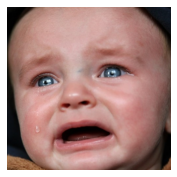

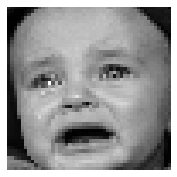

[3.8433675e-02 5.6125928e-04 6.7356840e-02 8.7549863e-03 8.5838246e-01
 4.4454748e-04 2.6066246e-02]
表情為： Sad 信心 85.84 %



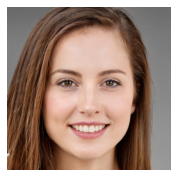

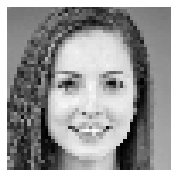

[2.0819679e-09 5.3366450e-14 1.9811941e-09 9.9991024e-01 7.0818684e-09
 2.5164598e-08 8.9751717e-05]
表情為： Happy 信心 99.99 %


In [ ]:
print(Emotion_Rule)

print()

read_plot_and_test("test_image1.jpg")

print()

read_plot_and_test("test_image2.jpeg")